In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
ST_Mean = round(data['SkinThickness'].mean())
ST_Mean

21

In [6]:
INS_Mean = round(data['Insulin'].mean())
INS_Mean

80

In [7]:
data['SkinThickness'] = data['SkinThickness'].replace(0, ST_Mean)
data['Insulin'] = data['Insulin'].replace(0, INS_Mean)

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,80,33.6,0.627,50,1
1,1,85,66,29,80,26.6,0.351,31,0
2,8,183,64,21,80,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.iloc[0]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                      80.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

In [10]:
data.shape

(768, 9)

In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,26.743490,118.757812,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,9.546733,93.039581,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,80.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,80.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
data['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

<AxesSubplot: xlabel='Outcome', ylabel='count'>

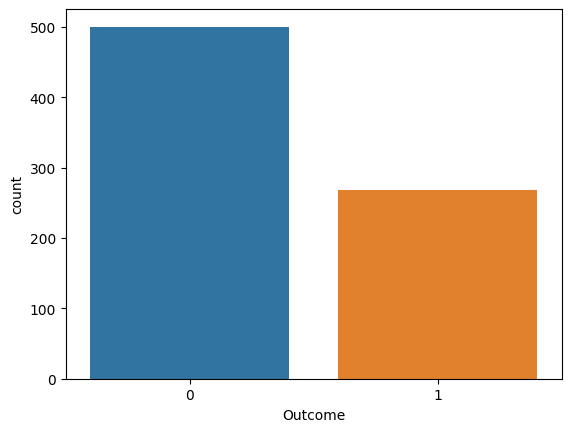

In [14]:
sns.countplot(x='Outcome',data=data)

C:\Users\asus\AppData\Local\Temp\ipykernel_6900\2121484975.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Pregnancies'])


<AxesSubplot: >

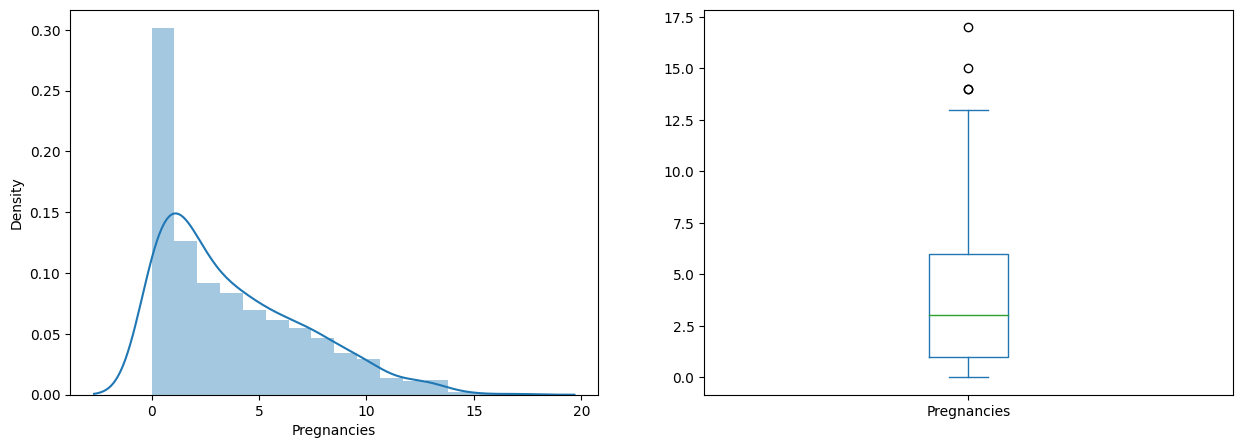

In [15]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Pregnancies'])
plt.subplot(122)
data['Pregnancies'].plot.box(figsize=(15,5))

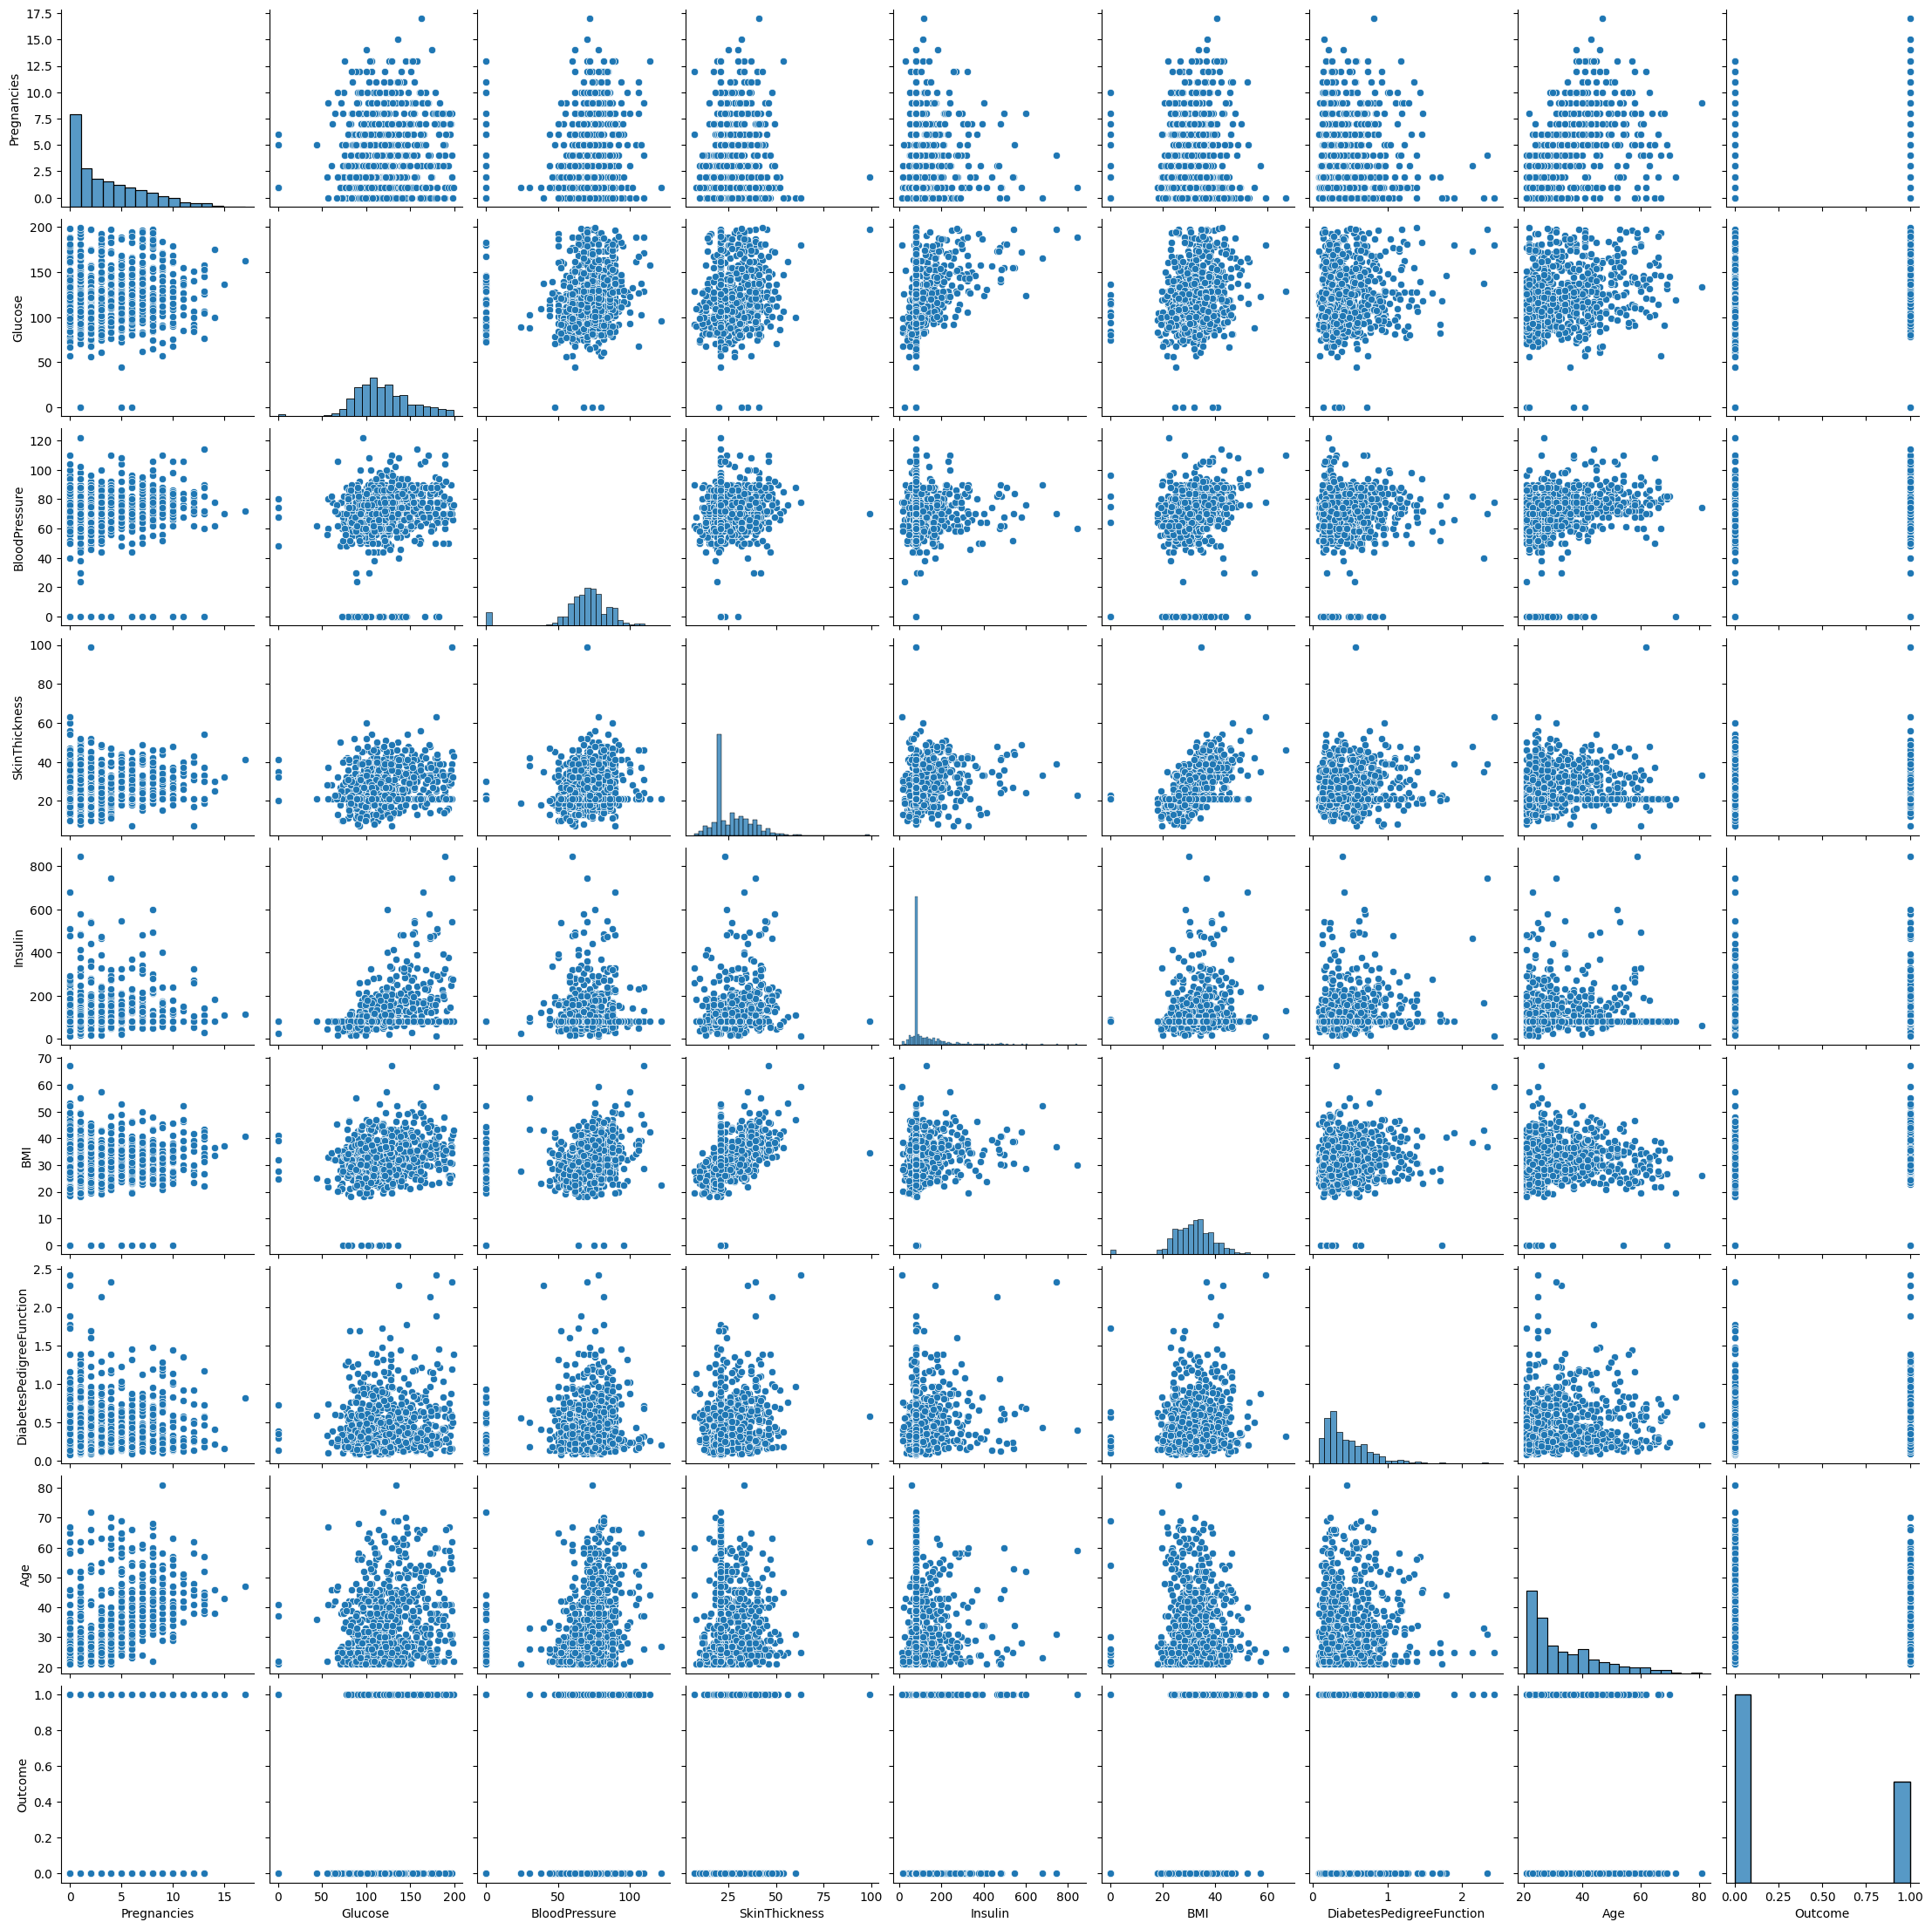

In [16]:
sns.pairplot(data)

In [17]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.016880,-0.017907,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.147813,0.390958,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.178789,0.074802,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.016880,0.147813,0.178789,1.000000,0.236319,0.502172,0.152925,0.031557,0.177741
Insulin,-0.017907,0.390958,0.074802,0.236319,1.000000,0.189280,0.157696,0.038898,0.179308
BMI,0.017683,0.221071,0.281805,0.502172,0.189280,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.152925,0.157696,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.031557,0.038898,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.177741,0.179308,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

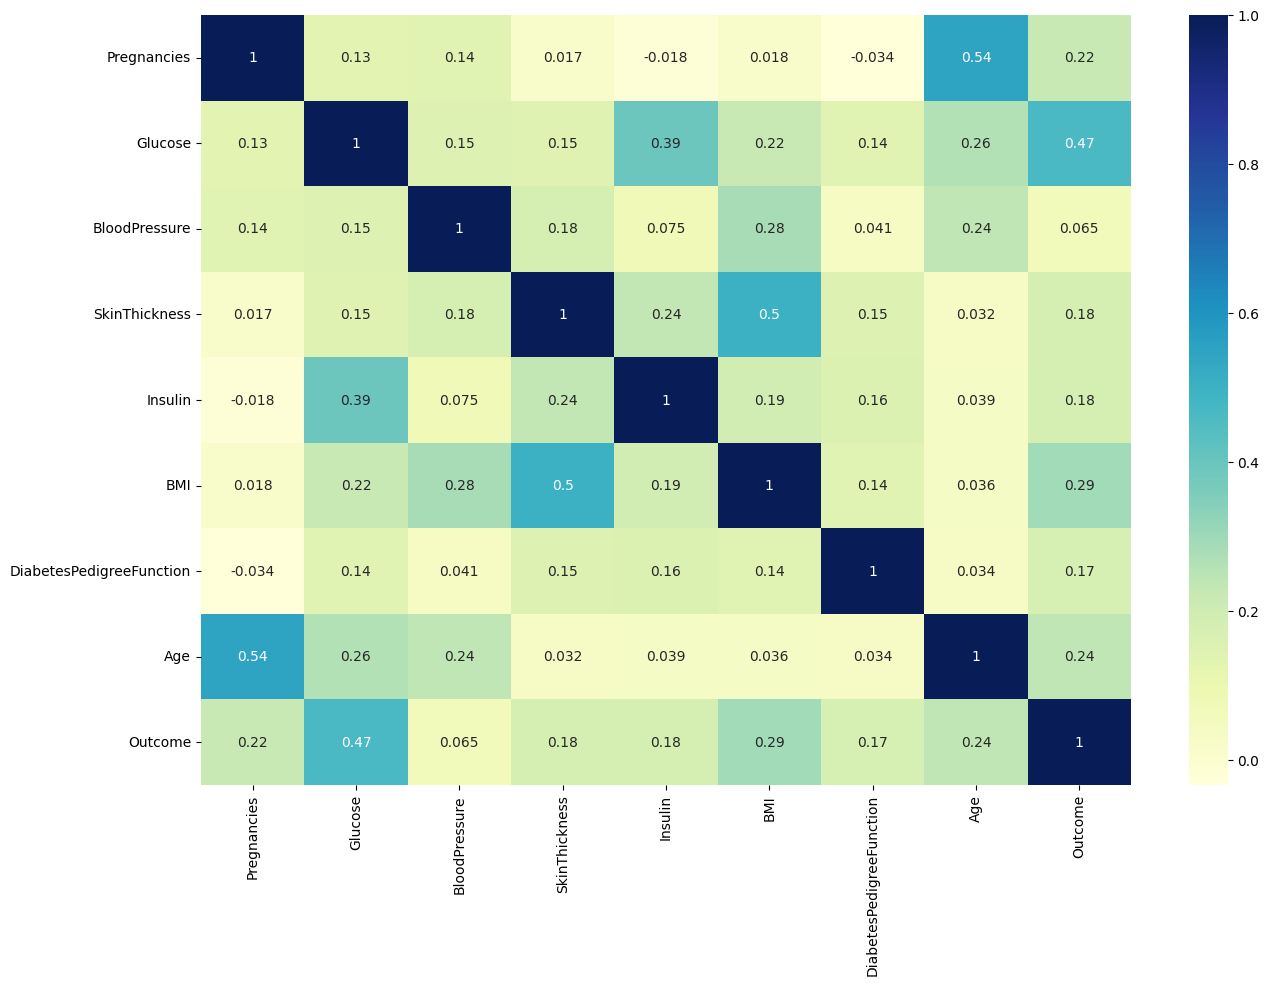

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")

In [19]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,25.502000,106.552000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,29.059701,141.529851,35.142537,0.550500,37.067164


In [20]:
X = data.drop(columns='Outcome',axis=1)
Y = data['Outcome']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=26)

In [22]:
model = LogisticRegression()
model.fit(X_train, Y_train)
model_predict = model.predict(X_test)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
accuracy_score(Y_test, model_predict)

0.8116883116883117

In [38]:
f1_score(Y_test, model_predict)

0.6947368421052633

In [37]:
print(model.score(X_test, Y_test))

0.8116883116883117


In [40]:
print(classification_report(Y_test, model_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       103
           1       0.75      0.65      0.69        51

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



In [41]:
features = np.array([[8, 150, 80, 50, 1, 26.6, 0.651, 45]])
model.predict(features)

if model.predict(features) == 0:
    print("Anda diprediksi bebas diabetes dengan akurasi sebesar", round(accuracy_score(Y_test, model_predict), 4)*100, "persen")
else:
    print("Anda terindikasi diabetes dengan akurasi sebesar", round(accuracy_score(Y_test, model_predict), 4)*100, "persen")


Anda terindikasi diabetes dengan akurasi sebesar 81.17 persen


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(Y_test, model_predict)
c_matrix

array([[92, 11],
       [18, 33]], dtype=int64)